In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape

(42000, 785)

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(28000, 784)

In [8]:
train_x = train_data.drop("label", axis=1)
train_y = train_data['label']

<AxesSubplot:xlabel='label', ylabel='count'>

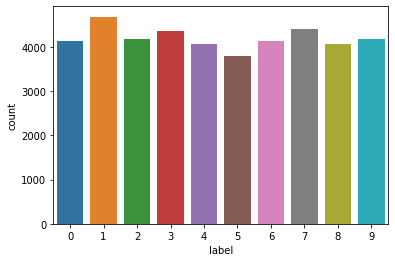

In [9]:
sns.countplot(x=train_y)

In [10]:
train_y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
train_x.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
train_y.isnull().any()

False

In [13]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Normalize Data (Preprocessing) </br>
Data will be in range of [0-1] </br>
Min : 0</br>
Max : 1</br>

In [14]:
norm_train_x = train_x / 255.0
norm_test_data = test_data / 255.0

Reshape Data</br>
(28000,784) -> (28000,28,28,1)</br>
Note : 1 is the channel</br>
As the image is grayscale(black & white), channel is only 1, whereas colored image have 3 channels (rgb)

In [15]:
norm_train_x = norm_train_x.values.reshape(norm_train_x.shape[0],28,28,1)
norm_test_data = norm_test_data.values.reshape(norm_test_data.shape[0],28,28,1)

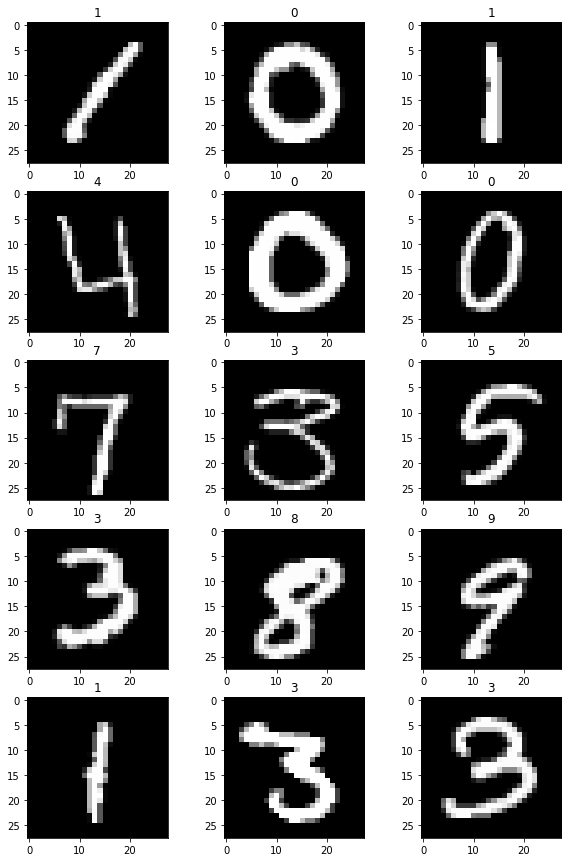

In [16]:
plt.figure(figsize=(10,15))
for i in range(15):  
    plt.subplot(5,3,i+1)
    plt.imshow(norm_train_x[i], cmap='gray')
    plt.title(train_y[i])
plt.show()

One hot encoding for labels

In [17]:
# Creates one hot encoding for labels
# num_classes = 10 (digits 0-9)
train_y = to_categorical(train_y, num_classes=10)

In [18]:
x_train, x_val, y_train, y_val = train_test_split(norm_train_x, train_y, test_size=0.2 ,random_state=30, stratify=train_y)

In [19]:
x_train.shape

(33600, 28, 28, 1)

In [20]:
x_val.shape

(8400, 28, 28, 1)

In [21]:
model_no_dropout = Sequential([
    Conv2D(filters=64, kernel_size=3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=32, kernel_size=3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dense(10, activation="softmax")
])

2022-05-10 06:34:27.101520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 06:34:27.195620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 06:34:27.196376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 06:34:27.197529: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
model_no_dropout.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [23]:
model_no_dropout.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
history_no_dropout = model_no_dropout.fit(x_train, y_train, batch_size=64, epochs=10, validation_data = (x_val, y_val), verbose = 2)

2022-05-10 06:34:29.978985: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-05-10 06:34:31.254523: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


525/525 - 8s - loss: 0.2411 - accuracy: 0.9256 - val_loss: 0.0877 - val_accuracy: 0.9726
Epoch 2/10
525/525 - 2s - loss: 0.0689 - accuracy: 0.9780 - val_loss: 0.0632 - val_accuracy: 0.9815
Epoch 3/10
525/525 - 2s - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 4/10
525/525 - 2s - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0501 - val_accuracy: 0.9850
Epoch 5/10
525/525 - 2s - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0579 - val_accuracy: 0.9844
Epoch 6/10
525/525 - 2s - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0551 - val_accuracy: 0.9860
Epoch 7/10
525/525 - 2s - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0597 - val_accuracy: 0.9863
Epoch 8/10
525/525 - 2s - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0701 - val_accuracy: 0.9862
Epoch 9/10
525/525 - 2s - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0673 - val_accuracy: 0.9856
Epoch 10/10
525/525 - 2s - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0645 - val_accuracy: 0.9857


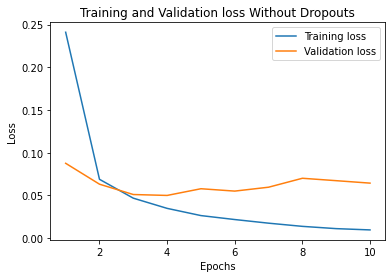

In [25]:
loss = history_no_dropout.history['loss']
val_loss = history_no_dropout.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss Without Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

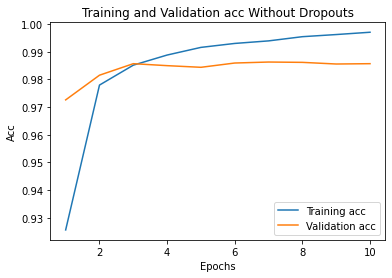

In [26]:
acc = history_no_dropout.history['accuracy']
val_acc = history_no_dropout.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and Validation acc Without Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [27]:
model_with_dropout = Sequential([
    Conv2D(filters=64, kernel_size=3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(filters=32, kernel_size=3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

In [28]:
model_with_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

In [29]:
model_with_dropout.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [30]:
history_with_dropout = model_with_dropout.fit(x_train, y_train, batch_size=64, epochs=10, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
525/525 - 2s - loss: 0.3428 - accuracy: 0.8925 - val_loss: 0.0983 - val_accuracy: 0.9699
Epoch 2/10
525/525 - 2s - loss: 0.1176 - accuracy: 0.9642 - val_loss: 0.0629 - val_accuracy: 0.9801
Epoch 3/10
525/525 - 2s - loss: 0.0827 - accuracy: 0.9732 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 4/10
525/525 - 2s - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0434 - val_accuracy: 0.9871
Epoch 5/10
525/525 - 2s - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.0461 - val_accuracy: 0.9865
Epoch 6/10
525/525 - 2s - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.0401 - val_accuracy: 0.9877
Epoch 7/10
525/525 - 2s - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.0470 - val_accuracy: 0.9875
Epoch 8/10
525/525 - 2s - loss: 0.0454 - accuracy: 0.9854 - val_loss: 0.0391 - val_accuracy: 0.9894
Epoch 9/10
525/525 - 2s - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0377 - val_accuracy: 0.9904
Epoch 10/10
525/525 - 2s - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0386 - val_accuracy: 0.9900

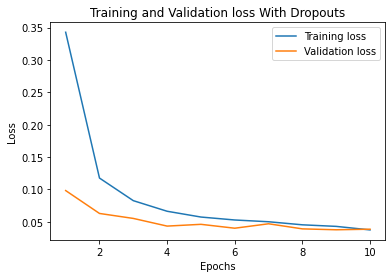

In [31]:
loss = history_with_dropout.history['loss']
val_loss = history_with_dropout.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss With Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

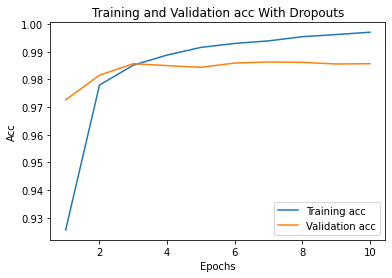

In [32]:
acc = history_no_dropout.history['accuracy']
val_acc = history_no_dropout.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and Validation acc With Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

Data Augmentation

In [33]:
data_gen = ImageDataGenerator(
    width_shift_range=0.15,  # randomly shift images horizontally by 15% 
    height_shift_range=0.15,  # randomly shift images vertically by 15%
    rotation_range=15, # rotate image by 15 degrees
    zoom_range=0.15, # zoom by 15%
    vertical_flip=False,     # randomly flip images vertically is False
    horizontal_flip=False     # randomly flip images horizontally is False
) 

In [34]:
data_gen.fit(x_train)

In [35]:
history_with_dropout_gen = model_with_dropout.fit(data_gen.flow(x_train,y_train,batch_size=64),epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
525/525 [==============================] - 10s 18ms/step - loss: 0.5127 - accuracy: 0.8452 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 2/20
525/525 [==============================] - 10s 19ms/step - loss: 0.2868 - accuracy: 0.9141 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 3/20
525/525 [==============================] - 10s 19ms/step - loss: 0.2237 - accuracy: 0.9326 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 4/20
525/525 [==============================] - 11s 20ms/step - loss: 0.1986 - accuracy: 0.9403 - val_loss: 0.0471 - val_accuracy: 0.9865
Epoch 5/20
525/525 [==============================] - 10s 18ms/step - loss: 0.1827 - accuracy: 0.9452 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 6/20
525/525 [==============================] - 10s 19ms/step - loss: 0.1641 - accuracy: 0.9512 - val_loss: 0.0438 - val_accuracy: 0.9874
Epoch 7/20
525/525 [==============================] - 11s 20ms/step - loss: 0.1591 - accuracy: 0.9524 - val_loss: 0.0458 - val_accuracy:

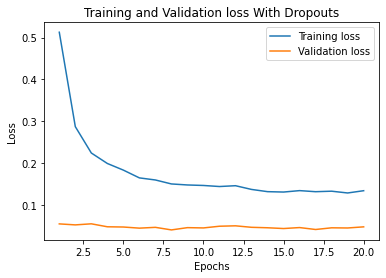

In [36]:
loss = history_with_dropout_gen.history['loss']
val_loss = history_with_dropout_gen.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss With Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

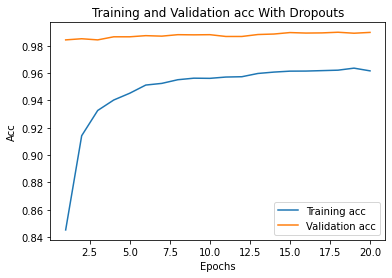

In [37]:
acc = history_with_dropout_gen.history['accuracy']
val_acc = history_with_dropout_gen.history['val_accuracy']
epochs = range(1, 21)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and Validation acc With Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [38]:
y_pred = model_with_dropout.predict(x_val)
y_pred_classes = np.argmax(y_pred,axis=1)
y_val_classes = np.argmax(y_val,axis=1)

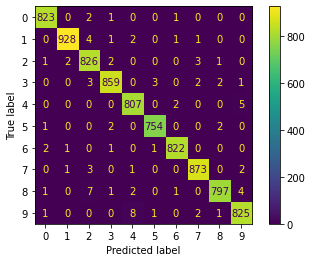

In [39]:
cm = confusion_matrix(y_val_classes,y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [40]:
results = model_with_dropout.predict(norm_test_data)
results = np.argmax(results,axis = 1)

In [41]:
submit = pd.DataFrame({"ImageId":list(range(1,len(results)+1)), "Label":results})

In [42]:
submit.to_csv("submision.csv",index=False)